In [108]:
import pandas as pd
import env
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
import wrangle as w
import explore as e

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [109]:
df = w.acquire_zillow()
df.head()

,parcelid,propertylandusetypeid,typeconstructiontypeid,storytypeid,airconditioningtypeid,architecturalstyletypeid,buildingclasstypeid,heatingorsystemtypeid,id,basementsqft,...,id.1,logerror,transactiondate,heatingorsystemdesc,buildingclassdesc,architecturalstyledesc,airconditioningdesc,storydesc,typeconstructiondesc,propertylandusedesc
0,14297519,261.0,NaN,NaN,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
1,17052889,261.0,NaN,NaN,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
2,14186244,261.0,NaN,NaN,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
3,12177905,261.0,NaN,NaN,NaN,NaN,NaN,2.0,2288172,NaN,...,3,-0.103410,2017-01-01,Central,NaN,NaN,NaN,NaN,NaN,Single Family Residential
4,12095076,261.0,NaN,NaN,1.0,NaN,NaN,2.0,781532,NaN,...,6,-0.001011,2017-01-01,Central,NaN,NaN,Central,NaN,NaN,Single Family Residential


In [110]:
df = w.prepare_zillow(df)
df.head().T

,0,1,2,3,4
parcel_id,14297519,17052889,14186244,12177905,12095076
propertylandusetypeid,261.0,261.0,261.0,261.0,261.0
basement_sqft,0.0,0.0,0.0,0.0,0.0
bath_count,3.5,1.0,2.0,3.0,3.0
bed_count,4.0,2.0,3.0,4.0,4.0
calc_bath_and_bed,3.5,1.0,2.0,3.0,3.0
decktypeid,0.0,0.0,0.0,0.0,0.0
calc_sqft,3100.0,1465.0,1243.0,2376.0,2962.0
finished_sqft12,3100.0,1465.0,1243.0,2376.0,2962.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0


In [111]:
df = e.get_counties(df)
df.head().T

,0,1,2,3,4
parcel_id,14297519,17052889,14186244,12177905,12095076
propertylandusetypeid,261.0,261.0,261.0,261.0,261.0
basement_sqft,0.0,0.0,0.0,0.0,0.0
bath_count,3.5,1.0,2.0,3.0,3.0
bed_count,4.0,2.0,3.0,4.0,4.0
calc_bath_and_bed,3.5,1.0,2.0,3.0,3.0
decktypeid,0.0,0.0,0.0,0.0,0.0
calc_sqft,3100.0,1465.0,1243.0,2376.0,2962.0
finished_sqft12,3100.0,1465.0,1243.0,2376.0,2962.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0


In [113]:
df['logerror_bins'] = pd.cut(df.log_error, [-5, -.2, -.05, .05, .2, 4])

In [112]:
df = e.create_features(df)
df.head().T

,0,1,2,3,4
parcel_id,14297519,17052889,14186244,12177905,12095076
propertylandusetypeid,261.0,261.0,261.0,261.0,261.0
basement_sqft,0.0,0.0,0.0,0.0,0.0
bath_count,3.5,1.0,2.0,3.0,3.0
bed_count,4.0,2.0,3.0,4.0,4.0
calc_bath_and_bed,3.5,1.0,2.0,3.0,3.0
decktypeid,0.0,0.0,0.0,0.0,0.0
calc_sqft,3100.0,1465.0,1243.0,2376.0,2962.0
finished_sqft12,3100.0,1465.0,1243.0,2376.0,2962.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0


<AxesSubplot:xlabel='taxrate', ylabel='log_error'>

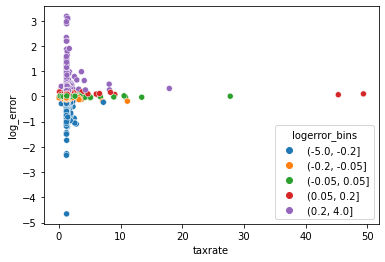

In [115]:
sns.scatterplot(x='', y='log_error', data=df[df.cola == 1], hue='logerror_bins')


<AxesSubplot:xlabel='bath_bed_ratio', ylabel='log_error'>

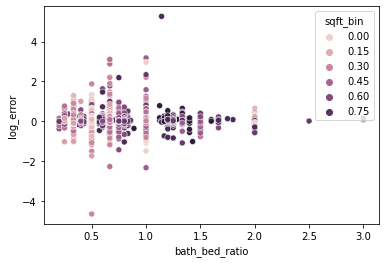

In [99]:
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=df[df.cola == 1], hue='sqft_bin')


<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='log_error'>

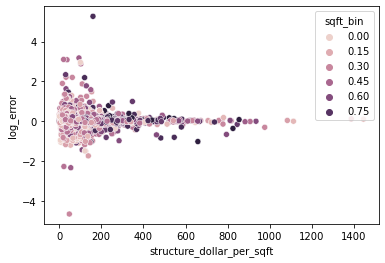

In [96]:
sns.scatterplot(x='structure_dollar_per_sqft', y='log_error', data=df[df.cola == 1], hue='sqft_bin')


<AxesSubplot:xlabel='acres', ylabel='log_error'>

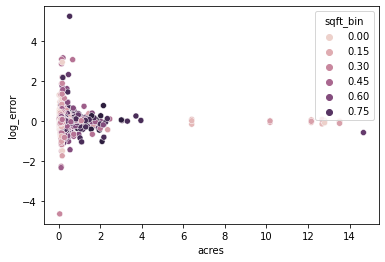

In [95]:
sns.scatterplot(x='acres', y='log_error', data=df[df.cola == 1], hue='sqft_bin')


<AxesSubplot:xlabel='age', ylabel='log_error'>

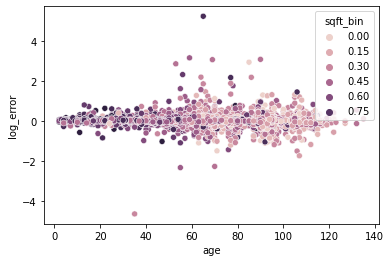

In [93]:
sns.scatterplot(x='age', y='log_error', data=df[df.cola == 1], hue='sqft_bin')


<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='log_error'>

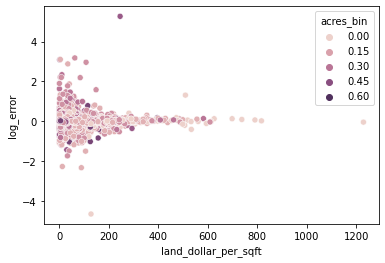

In [92]:
sns.scatterplot(x='land_dollar_per_sqft', y='log_error', data=df[df.cola == 1], hue='acres_bin')


<AxesSubplot:xlabel='bath_bed_ratio', ylabel='log_error'>

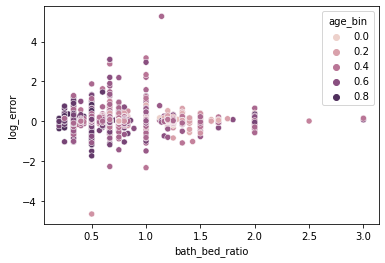

In [88]:
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=df[df.cola == 1], hue='age_bin')


<AxesSubplot:xlabel='acres', ylabel='log_error'>

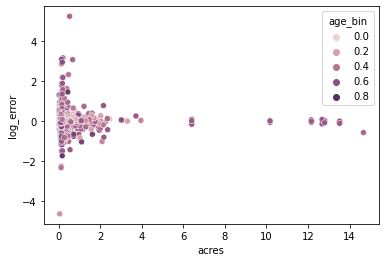

In [85]:
sns.scatterplot(x='acres', y='log_error', data=df[df.cola == 1], hue='age_bin')


<AxesSubplot:xlabel='bath_bed_ratio', ylabel='log_error'>

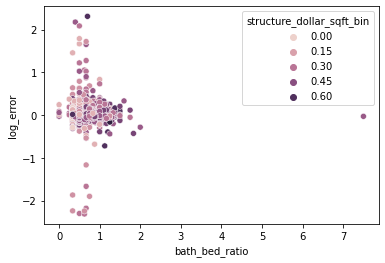

In [84]:
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=df[df.fips == 6111], hue='structure_dollar_sqft_bin')


<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='log_error'>

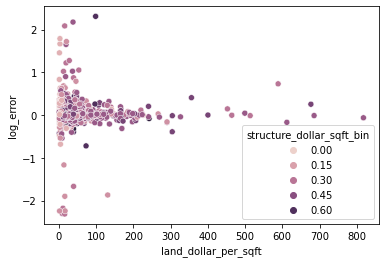

In [83]:
sns.scatterplot(x='land_dollar_per_sqft', y='log_error', data=df[df.fips == 6111], hue='structure_dollar_sqft_bin')


<AxesSubplot:xlabel='acres', ylabel='log_error'>

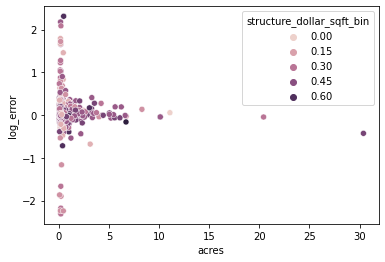

In [81]:
sns.scatterplot(x='acres', y='log_error', data=df[df.fips == 6111], hue='structure_dollar_sqft_bin')


<AxesSubplot:xlabel='age', ylabel='log_error'>

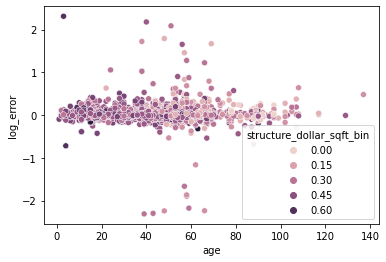

In [79]:
sns.scatterplot(x='age', y='log_error', data=df[df.fips == 6111], hue='structure_dollar_sqft_bin')


<AxesSubplot:xlabel='bath_bed_ratio', ylabel='log_error'>

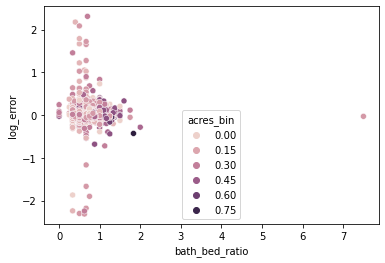

In [78]:
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=df[df.fips == 6111], hue='acres_bin')


<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='log_error'>

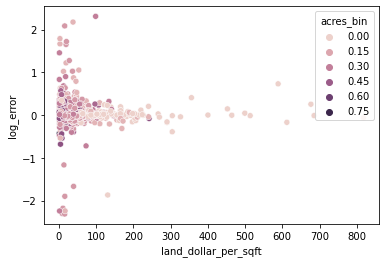

In [77]:
sns.scatterplot(x='land_dollar_per_sqft', y='log_error', data=df[df.fips == 6111], hue='acres_bin')


<AxesSubplot:xlabel='taxrate', ylabel='log_error'>

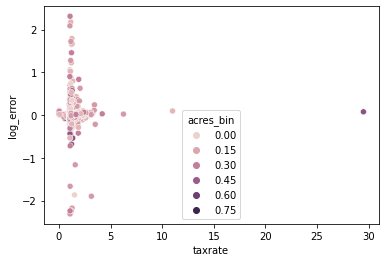

In [75]:
sns.scatterplot(x='taxrate', y='log_error', data=df[df.fips == 6111], hue='acres_bin')


<AxesSubplot:xlabel='bath_bed_ratio', ylabel='log_error'>

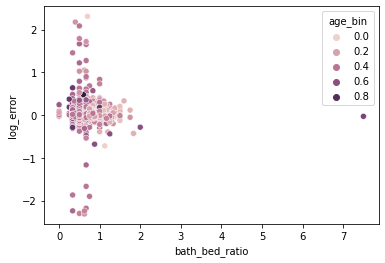

In [73]:
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=df[df.fips == 6111], hue='age_bin')


<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='log_error'>

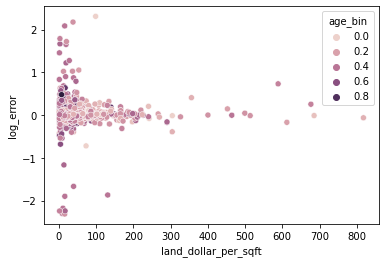

In [72]:
sns.scatterplot(x='land_dollar_per_sqft', y='log_error', data=df[df.fips == 6111], hue='age_bin')


<AxesSubplot:xlabel='acres', ylabel='log_error'>

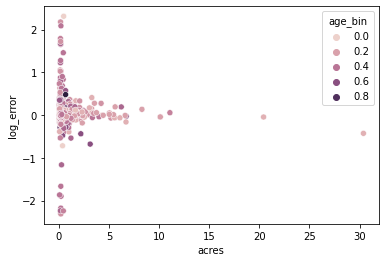

In [70]:
sns.scatterplot(x='acres', y='log_error', data=df[df.fips == 6111], hue='age_bin')


<AxesSubplot:xlabel='bath_bed_ratio', ylabel='log_error'>

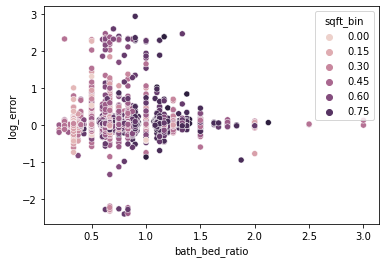

In [50]:
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=df[df.fips == 6059], hue='sqft_bin')


<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='log_error'>

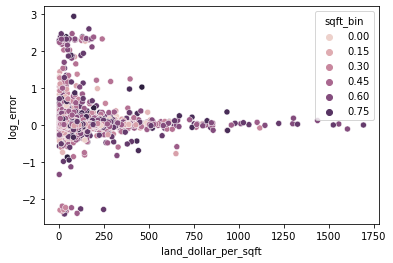

In [48]:
sns.scatterplot(x='land_dollar_per_sqft', y='log_error', data=df[df.fips == 6059], hue='sqft_bin')


<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='log_error'>

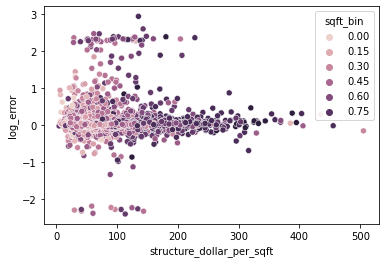

In [47]:
sns.scatterplot(x='structure_dollar_per_sqft', y='log_error', data=df[df.fips == 6059], hue='sqft_bin')


<AxesSubplot:xlabel='acres', ylabel='log_error'>

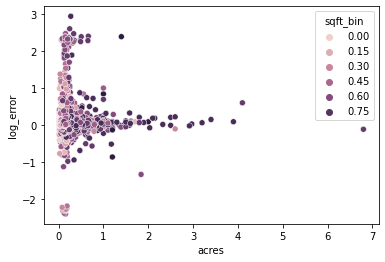

In [46]:
sns.scatterplot(x='acres', y='log_error', data=df[df.fips == 6059], hue='sqft_bin')


<AxesSubplot:xlabel='taxrate', ylabel='log_error'>

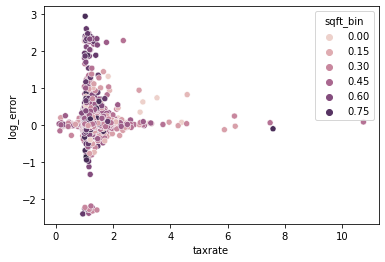

In [45]:
sns.scatterplot(x='taxrate', y='log_error', data=df[df.fips == 6059], hue='sqft_bin')


<AxesSubplot:xlabel='age', ylabel='log_error'>

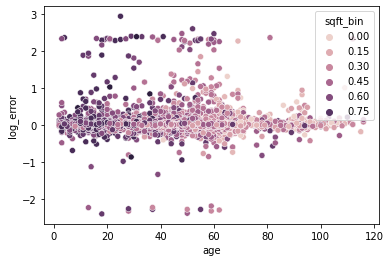

In [44]:
sns.scatterplot(x='age', y='log_error', data=df[df.fips == 6059], hue='sqft_bin')


<AxesSubplot:xlabel='bath_bed_ratio', ylabel='log_error'>

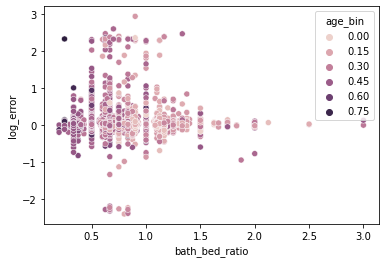

In [39]:
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=df[df.fips == 6059], hue='age_bin')


<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='log_error'>

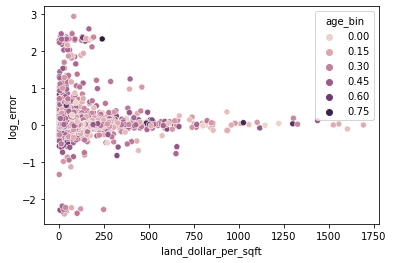

In [38]:
sns.scatterplot(x='land_dollar_per_sqft', y='log_error', data=df[df.fips == 6059], hue='age_bin')


<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='log_error'>

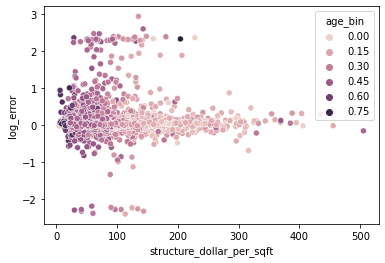

In [37]:
sns.scatterplot(x='structure_dollar_per_sqft', y='log_error', data=df[df.fips == 6059], hue='age_bin')


<AxesSubplot:xlabel='acres', ylabel='log_error'>

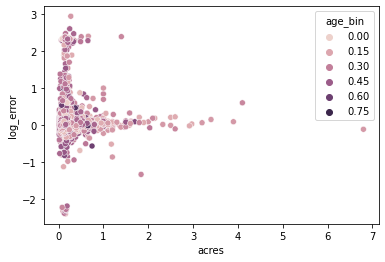

In [36]:
sns.scatterplot(x='acres', y='log_error', data=df[df.fips == 6059], hue='age_bin')


<AxesSubplot:xlabel='taxrate', ylabel='log_error'>

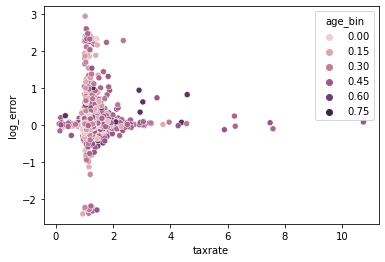

In [34]:
sns.scatterplot(x='taxrate', y='log_error', data=df[df.fips == 6059], hue='age_bin')


<AxesSubplot:xlabel='cola', ylabel='log_error'>

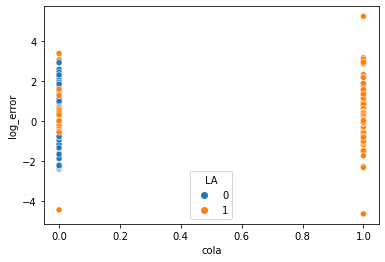

In [30]:
sns.scatterplot(x='cola', y='log_error', data=df, hue='LA')
# some LA is not labeled as city of LA

<AxesSubplot:xlabel='room_count', ylabel='log_error'>

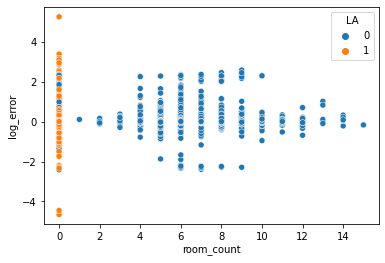

In [21]:
sns.scatterplot(x='room_count', y='log_error', data=df, hue='LA')

<AxesSubplot:xlabel='age', ylabel='log_error'>

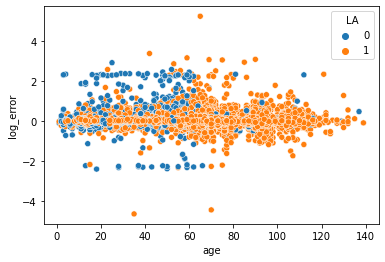

In [19]:
sns.scatterplot(x='age', y='log_error', data=df, hue='LA')


<AxesSubplot:xlabel='longitude', ylabel='log_error'>

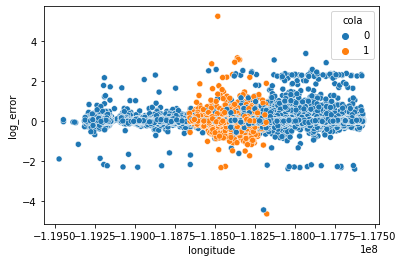

In [9]:
sns.scatterplot(x='longitude', y='log_error', data=df, hue='cola')

<AxesSubplot:xlabel='latitude', ylabel='log_error'>

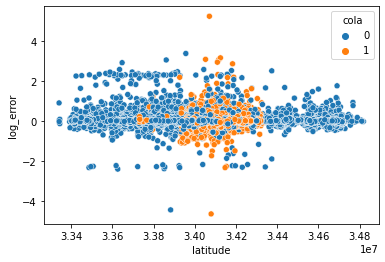

In [8]:
sns.scatterplot(x='latitude', y='log_error', data=df, hue='cola')

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='log_error'>

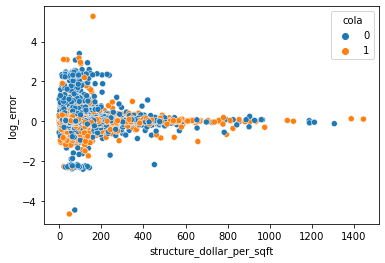

In [58]:
sns.scatterplot(x='structure_dollar_per_sqft', y='log_error', data=df, hue='cola')

<AxesSubplot:xlabel='age', ylabel='log_error'>

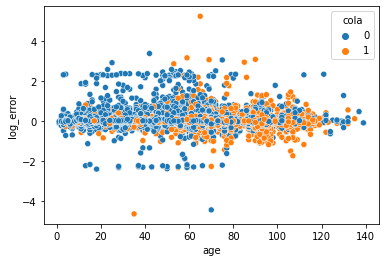

In [52]:
sns.scatterplot(x='age', y='log_error', data=df, hue='cola')

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='log_error'>

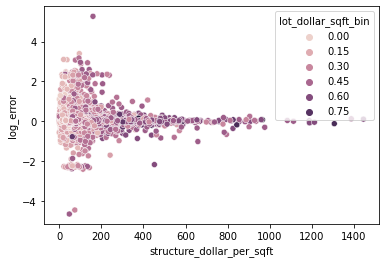

In [49]:
sns.scatterplot(x='structure_dollar_per_sqft', y='log_error', data=df, hue='lot_dollar_sqft_bin')

<AxesSubplot:xlabel='taxrate', ylabel='log_error'>

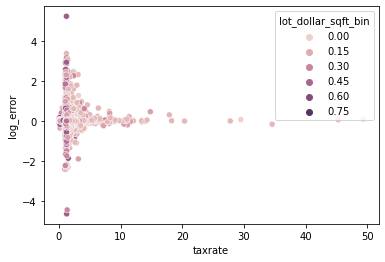

In [47]:
sns.scatterplot(x='taxrate', y='log_error', data=df, hue='lot_dollar_sqft_bin')

<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='log_error'>

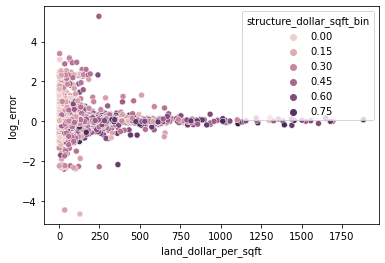

In [44]:
sns.scatterplot(x='land_dollar_per_sqft', y='log_error', data=df, hue='structure_dollar_sqft_bin')

<AxesSubplot:xlabel='taxrate', ylabel='log_error'>

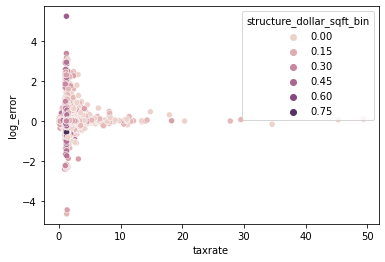

In [41]:
sns.scatterplot(x='taxrate', y='log_error', data=df, hue='structure_dollar_sqft_bin')

<AxesSubplot:xlabel='bath_bed_ratio', ylabel='log_error'>

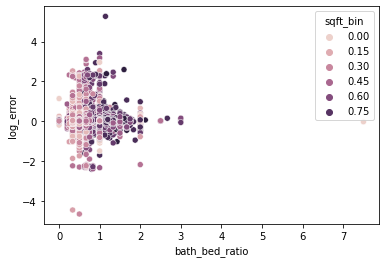

In [39]:
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=df, hue='sqft_bin')

<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='log_error'>

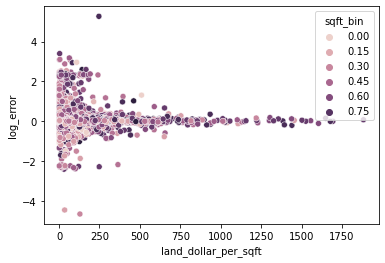

In [38]:
sns.scatterplot(x='land_dollar_per_sqft', y='log_error', data=df, hue='sqft_bin')

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='log_error'>

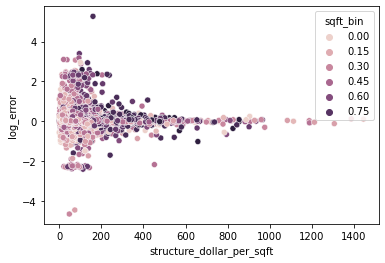

In [37]:
sns.scatterplot(x='structure_dollar_per_sqft', y='log_error', data=df, hue='sqft_bin')

<AxesSubplot:xlabel='taxrate', ylabel='log_error'>

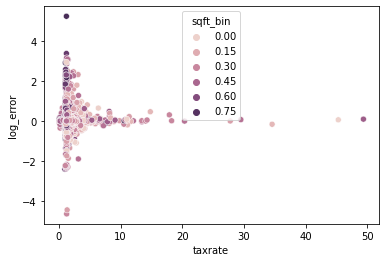

In [35]:
sns.scatterplot(x='taxrate', y='log_error', data=df, hue='sqft_bin')

<AxesSubplot:xlabel='age', ylabel='log_error'>

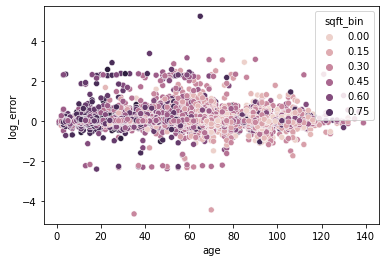

In [34]:
sns.scatterplot(x='age', y='log_error', data=df, hue='sqft_bin')

<AxesSubplot:xlabel='bath_bed_ratio', ylabel='log_error'>

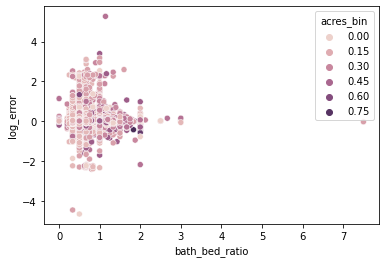

In [32]:
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=df, hue='acres_bin')

<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='log_error'>

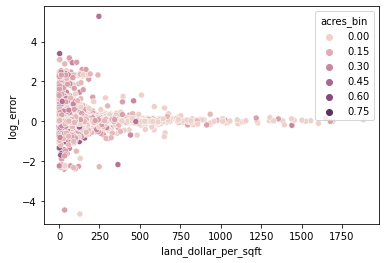

In [31]:
sns.scatterplot(x='land_dollar_per_sqft', y='log_error', data=df, hue='acres_bin')

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='log_error'>

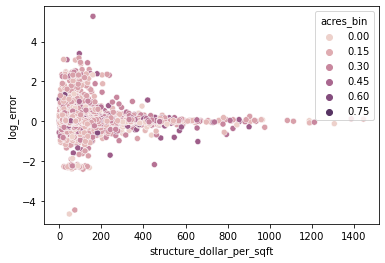

In [30]:
sns.scatterplot(x='structure_dollar_per_sqft', y='log_error', data=df, hue='acres_bin')

<AxesSubplot:xlabel='bath_bed_ratio', ylabel='log_error'>

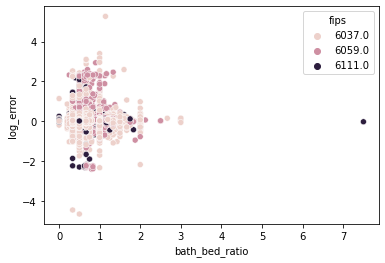

In [14]:
sns.scatterplot(x='bath_bed_ratio', y='log_error', data=df, hue='fips')

<AxesSubplot:xlabel='land_dollar_per_sqft', ylabel='log_error'>

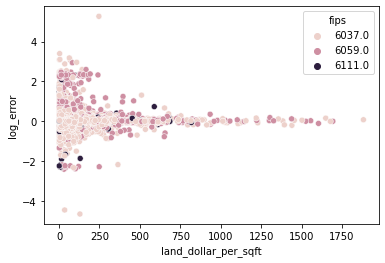

In [11]:
sns.scatterplot(x='land_dollar_per_sqft', y='log_error', data=df, hue='fips')

<AxesSubplot:xlabel='structure_dollar_per_sqft', ylabel='log_error'>

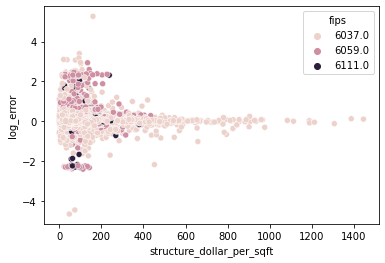

In [9]:
sns.scatterplot(x='structure_dollar_per_sqft', y='log_error', data=df, hue='fips')

<AxesSubplot:xlabel='age', ylabel='log_error'>

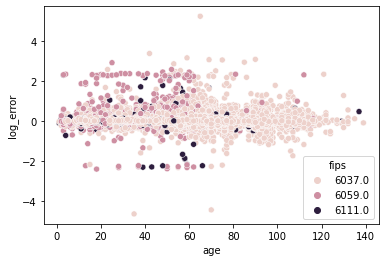

In [13]:
sns.scatterplot(x='age', y='log_error', data=df, hue='fips')